# Figures & key statistics for: Neuroscientific insights into the development of analogical reasoning

Kirstie J. Whitaker\*, Michael S. Vendetti\*, Carter Wendelken & Silvia A. Bunge

In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import palettable
import pandas as pd
import sys
import warnings


In [2]:
sys.path.append('../SCRIPTS/')

import visan_results_figures as visan

## Figure 1

**a**. Analogy Task. Participants indicated which of the four choices was associated with an item in analogous fashion to the relation shared between the top two items. In this example, the refrigerator is associated with the milk carton (i.e., refrigerator stores the milk carton) in an analogous way to the dress and the closet items. On each trial, a semantic lure (e.g., cow), a perceptual lure (e.g., clock), and an unrelated lure (e.g., tennis racket) were included. Thus, participants’ correct choice was based on understanding the correct semantic association and disregarding irrelevant semantic or perceptual information. **b**. Semantic matching task. Participants decide which of the four choices share a semantic relationship with a target object. In this example, the pen is used to write on the notepad, and thus is the item with the strongest semantic association. On each semantic trial, a perceptual lure (e.g., a shower curtain) as well as two unrelated lures were included. Thus, participants had to understand that the correct choice was based on semantic, rather than just perceptual, associations.

In [3]:
analogy_stimulus_file = '../EXAMPLE_STIMULI/clothesclosetmilkfridge_whitebg.jpg'
semantic_stimulus_file = '../EXAMPLE_STIMULI/notebookpen_whitebg.jpg'

In [4]:
# Define the colors we're going to use
color_list = palettable.colorbrewer.get_map('Set1', 'qualitative', 5).mpl_colors

# Define the colour dictionary to make it easy to index these colors :)
color_dict = {}
color_dict['red'] = color_list[0]
color_dict['blue'] = color_list[1]
color_dict['green'] = color_list[2]
color_dict['purple'] = color_list[3]
color_dict['orange'] = color_list[4]

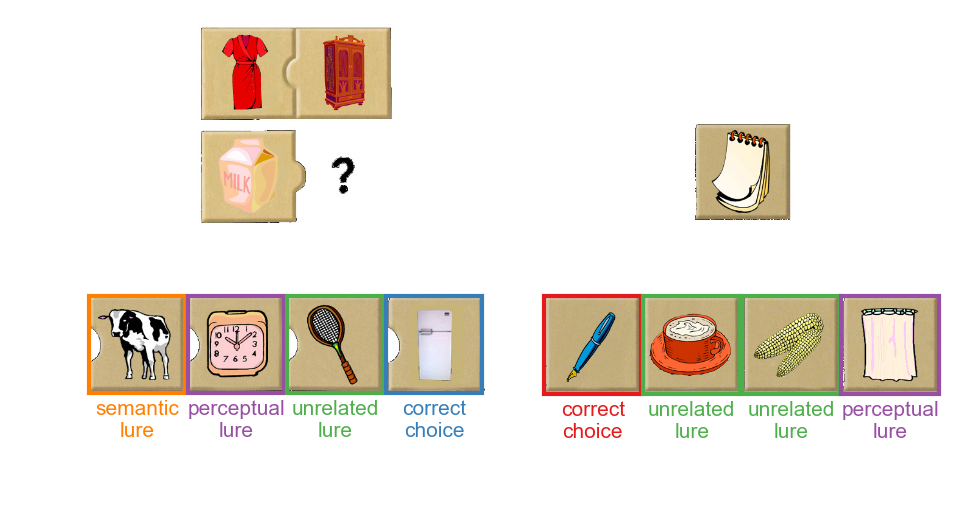

In [5]:
visan.make_figure1(analogy_stimulus_file, semantic_stimulus_file, color_dict)

## Figure 2

Accuracy improved with age (**a**), while response times decreased (**b**) for both semantic (red) and analogy (blue) trials. The number of errors on analogy trials decreased with age (**c**), and semantic lures (yellow) were more common than perceptual lures (purple), which were themselves more common than unrelated lures (green) across all ages (**c**). Lines for all plots represent 95% confidence intervals around predicted values using a quadratic model.

In [6]:
f_behav = '../DATA/WhitakerVendetti_BehavData.csv'

To go along with figure 2 I'm going to print out the statistics that describe the different responses that people can make during the task, and how they related to each other.

In [7]:
visan.report_behav_stats(f_behav)

===== Behavioural Statistics ======
R1_percent_acc: N = 138, M = 89.384, SD = 12.515
   R1 vs R2 (paired): t(137) = 15.080, p = 0.000
R2_percent_acc: N = 138, M = 74.949, SD = 18.961
R2_sub_R1_percent_acc: M = -14.435, SD = 11.244
    N R2 gt R1 = 5, N R2 lt R1 = 126, N same = 7
R1_meanRTcorr_cor: N = 138, M = 3.598, SD = 0.993
   R1 vs R2 (paired): t(137) = -23.715, p = 0.000
R2_meanRTcorr_cor: N = 138, M = 4.668, SD = 1.005
R2_sub_R1_meanRTcorr_cor: M = 1.069, SD = 0.530
    N R2 gt R1 = 134, N R2 lt R1 = 4, N same = 0
R2_percent_sem: N = 138, M = 12.239, SD = 9.624
   sem vs per (paired): t(137) = 10.641, p = 0.000
R2_percent_per: N = 138, M = 5.068, SD = 4.833
R2_percent_dis: N = 138, M = 2.810, SD = 3.486
   per vs dis (paired): t(137) = 5.420, p = 0.000

===== Correlations with age =====
=== R1_percent_acc ===
Linear w age
  Beta(Age) = 1.9672, P = 0.0000
  Rsq = 0.328, Rsq_adj = 0.323
  F(1.0, 136.0) = 66.339, P = 0.0000
Quadratic w age
  Beta(AgeSq) = -0.3356, P = 0.0000
  Beta

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'
# I can't find which line is triggering this error so I've just turned off the warning. Bad Kirstie.

visan.make_figure2(f_behav)

## Figure 3

Whole-brain activation patterns on average across all participants for the contrasts of semantic greater than fixation (yellow), analogy greater than fixation (red), and analogy greater than semantic (blue). Overlapping regions are shown in orange, green, purple and pink according to the Venn diagram, and all results are constrained to be within
regions liberally activated by the semantic or analogy tasks. Statistical tests are permutation tests, and thresholds are set using a cluster defining threshold of Z > 2.3 and are family-wise error-corrected at p < .05. Thresholded and unthresholded maps are available in NeuroVault at http://neurovault.org/collections/1658.

In [9]:
f_behav = '../DATA/WhitakerVendetti_BehavData.csv'
mean_results_surface_file = '../PIAL_COMBINED_PNGS/ALL_N95_Mean_activated_cluster_mask_r5000_clusterm_corrp_tstat1_pial_combined.png'
venn_file = '../DATA/VennDiagram.png'

In [10]:
visan.make_figure3(mean_results_surface_file, venn_file)

## Figure 4

Whole-brain activation patterns showing regions that show an increase in activation with age across all participants. Results for the semantic greater than fixation contrast are shown in yellow, analogy greater than fixation in red, and regions for which both are increasing are shown in orange. There were no regions that showed a within-person differential increase in activation during analogy trials compared to semantic trials. All results are constrained to be within regions liberally activated on average by the semantic or analogy tasks. Statistical tests are permutation tests, thresholds are set using a cluster defining threshold of Z > 2.3 and are family-wise error-corrected at p < .05. Thresholded and unthresholded maps are available in NeuroVault at http://neurovault.org/collections/1658.

In [ ]:
f_behav = '../DATA/WhitakerVendetti_BehavData.csv'
corrage_results_surface_file = '../PIAL_COMBINED_PNGS/ALL_N95_Corr_Age_activated_cluster_mask_r5000_clusterm_corrp_tstat1_pial_combined.png'
venn_file = '../DATA/VennDiagram.png'

f_mri_cope1 = '../DATA/EXTRACTED_TIMESERIES/ALL_N95_Corr_Age_cope2_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE1.txt'
f_mri_cope2 = '../DATA/EXTRACTED_TIMESERIES/ALL_N95_Corr_Age_cope2_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE2.txt'
f_mri_cope4 = '../DATA/EXTRACTED_TIMESERIES/ALL_N95_Corr_Age_cope2_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE4.txt'

# There's a future warning for pandas regarding reading in the MRI data files.
# I'm going to silence it here so you see a pretty output, but BE WARNED! Kx
warnings.simplefilter(action = "ignore", category = FutureWarning)

visan.make_figure4(corrage_results_surface_file, venn_file, f_behav, f_mri_cope1, f_mri_cope2, f_mri_cope4)

=== SEMANTIC > FIX ===
  Corr cluster 1 w age
    r = 0.505, p < .001
  Corr cluster 1 w R2acc
    r = 0.326, p = .001
  Corr cluster 1 w R2acc covar age
    r = -0.018, p = .861
=== ANALOGY > FIX ===
  Corr cluster 1 w age
    r = 0.594, p < .001
  Corr cluster 1 w R2acc
    r = 0.298, p = .003
  Corr cluster 1 w R2acc covar age
    r = -0.167, p = .106
=== ANA > SEM ===
  Corr cluster 1 w age
    r = 0.258, p = .012
  Corr cluster 1 w R2acc
    r = 0.049, p = .641
  Corr cluster 1 w R2acc covar age
    r = -0.173, p = .094


## Figure 5
Whole-brain analysis showing regions that demonstrate an increase in activation with accuracy on analogy trials across all participants after correcting for the effects of age. Only the contrast of semantic greater than fixation (shown in yellow) showed a significant correlation in left aLIPC (a). Panel b illustrates how activation in this region correlates with (i) age and (ii) accuracy on analogy trails after correcting for the effects of age. Very similar patterns are shown when activation on analogy trials are extracted from this region (c). All results are constrained to be within regions liberally activated on average by the semantic or analogy tasks. No regions in the right hemisphere or the medial aspect of the left hemisphere passed the threshold for significance. Statistical tests are permutation tests, thresholds are set using a cluster defining threshold of Z > 2.3 and are family-wise error-corrected at p < .05. Thresholded and unthresholded maps are available in NeuroVault at http://neurovault.org/collections/1658.

In [ ]:
f_behav = '../DATA/WhitakerVendetti_BehavData.csv'
corracc_results_surface_file = '../PIAL_COMBINED_PNGS/ALL_N95_Corr_R2acc_Age_activated_cluster_mask_r5000_clusterm_corrp_tstat1_pial_combined.png'

f_mri_cope1 = '../DATA/EXTRACTED_TIMESERIES/ALL_N95_Corr_R2acc_Age_cope1_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE1.txt'
f_mri_cope2 = '../DATA/EXTRACTED_TIMESERIES/ALL_N95_Corr_R2acc_Age_cope1_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE2.txt'
f_mri_cope4 = '../DATA/EXTRACTED_TIMESERIES/ALL_N95_Corr_R2acc_Age_cope1_activated_cluster_mask_randomise5000_clusterm_corrp_tstat1_COPE4.txt'

# There's a future warning for pandas regarding reading in the MRI data files.
# I'm going to silence it here so you see a pretty output, but BE WARNED! Kx
warnings.simplefilter(action = "ignore", category = FutureWarning)

visan.make_figure5(corracc_results_surface_file, f_behav, f_mri_cope1, f_mri_cope2, f_mri_cope4)